In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%pylab inline
#%pylab is a magic function in ipython.Magic functions in pylab always begin with the percent sign (%) followed without any spaces by a small text string; in essence, ipython magic functions define shortcuts particularly useful for interactive work
import itertools
#itertools — Functions creating iterators for efficient looping

Populating the interactive namespace from numpy and matplotlib


In [2]:
df=pd.read_csv('C:/Users/Pankaj/Downloads/train_ver2.csv',parse_dates= True)

C:\Users\Pankaj\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.columns

Index(['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo',
       'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel',
       'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext',
       'conyuemp', 'canal_entrada', 'indfall', 'tipodom', 'cod_prov',
       'nomprov', 'ind_actividad_cliente', 'renta', 'segmento',
       'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1'],
      dtype='object')

In [4]:
df=df.rename(columns={'fecha_dato':'Partition_Column',
'ncodpers':'Customer_code',
'ind_empleado':'Employee_index',
'pais_residencia':'Country_residence',
'sexo':'Customer_ sex',
'age':'Age',
'fecha_alta':'Account_Opening_Date',
'ind_nuevo':'Customer<6_months',
'antiguedad':'Customer_seniority',
'indrel':'1_99_Prime_Mo_S_E',
'ult_fec_cli_1t':'Last_Dt_prime_cust',
'indrel_1mes':'Cust_type_beg_mon',
'tiprel_1mes':'Cust_rel_type_beg_mon', 
'indresi':'Residence_index', 
'indext':'Foreigner_index', 
'conyuemp':'Spouse_emp_index',
'canal_entrada':'channel_to_join',
'indfall':'Deceased_index',
'tipodom':'Addres type',
'cod_prov':'Province_code',
'nomprov':'Province_name',
'ind_actividad_cliente':'Activity_index',
'renta':'Gross_income_household',
'segmento':'segmentation',
'ind_ahor_fin_ult1':'Saving_Account',
'ind_aval_fin_ult1':'Guarantees',
'ind_cco_fin_ult1':'Current_Accounts',
'ind_cder_fin_ult1':'Derivada_Account',
'ind_cno_fin_ult1':'Payroll_Account',
'ind_ctju_fin_ult1':'Junior_Account',
'ind_ctma_fin_ult1':'Más_particular_Account',
'ind_ctop_fin_ult1':'particular_Account',
'ind_ctpp_fin_ult1':'particular_Plus_Account',
'ind_deco_fin_ult1':'Short_term_depos',
'ind_deme_fin_ult1':'Medium_term_depos',
'ind_dela_fin_ult1':'Long_term_depos',
'ind_ecue_fin_ult1':'e-account',
'ind_fond_fin_ult1':'Funds',
'ind_hip_fin_ult1':'Mortgage',
'ind_plan_fin_ult1':'Pensions_1',
'ind_pres_fin_ult1':'Loans',
'ind_reca_fin_ult1':'Taxes',
'ind_tjcr_fin_ult1':'Credit_Card',
'ind_valo_fin_ult1':'Securities',
'ind_viv_fin_ult1':'Home_Account',
'ind_nomina_ult1':'Payroll',
'ind_nom_pens_ult1':'Pensions_2',
'ind_recibo_ult1':'Direct_Debit'})

In [5]:
df['Partition_Column']=pd.to_datetime(df['Partition_Column'])
df['Last_Dt_prime_cust']=pd.to_datetime(df['Last_Dt_prime_cust'])
df['Account_Opening_Date']=pd.to_datetime(df['Account_Opening_Date'])

In [6]:
df['Total_products']=df.ix[:,24:48].sum(axis=1,skipna=True)

C:\Users\Pankaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [7]:
df.groupby('Customer_code')['Total_products'].max().value_counts()

1.0     442835
0.0     225483
2.0     131867
3.0      56619
4.0      37563
5.0      22556
6.0      16401
7.0      11572
8.0       6682
9.0       3196
10.0      1251
11.0       472
12.0       109
13.0        34
14.0         4
15.0         1
Name: Total_products, dtype: int64

([<matplotlib.axis.XTick at 0x20955041e10>,
 <a list of 16 Text xticklabel objects>)

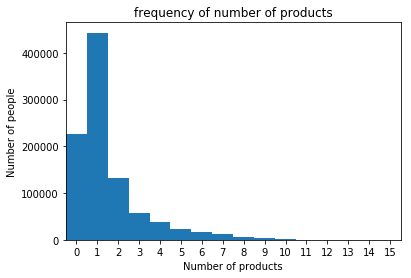

In [8]:
# Lets plot the histogram of number of products versus number of customers
plt.hist(df.groupby('Customer_code')['Total_products'].max(),bins=np.arange(-0.5,15.5,1))
plt.title('frequency of number of products')
plt.xlabel("Number of products")
plt.ylabel("Number of people")
plt.xlim(-0.5, 15.5)
plt.xticks(np.arange(16))

From the above histogram, we can conclude that there are more than 200,000 customers that are not holding any products in the given period. 

Since the 200,000 customers are not helpful for us in understanding any purchasing behaviour, and since we already have large volume of data for analysis data is large, we can exclude them from the analysis.

Also the maximum number of products, any customer can held is 15. The count of number of people holding the products is maximum when the number of products is 1.

In [ ]:
#The len() function returns the number of items in an object.
